In [1]:
import pandas as pd

In [175]:
df = pd.read_csv("penguins.csv", names=["island", "bill_len", "bill_depth", "flipper_len", "body_mass", "sex", "species"])

In [176]:
df

,island,bill_len,bill_depth,flipper_len,body_mass,sex,species
0,Torgersen,39.1,18.7,181.0,3750.0,male,Adelie
1,Torgersen,39.5,17.4,186.0,3800.0,female,Adelie
2,Torgersen,40.3,18.0,195.0,3250.0,female,Adelie
3,Torgersen,NaN,NaN,NaN,NaN,NaN,Adelie
4,Torgersen,36.7,19.3,193.0,3450.0,female,Adelie
...,...,...,...,...,...,...,...
339,Dream,55.8,19.8,207.0,4000.0,male,Chinstrap
340,Dream,43.5,18.1,202.0,3400.0,female,Chinstrap
341,Dream,49.6,18.2,193.0,3775.0,male,Chinstrap
342,Dream,50.8,19.0,210.0,4100.0,male,Chinstrap


## Q1)

In [177]:
df.isna()

,island,bill_len,bill_depth,flipper_len,body_mass,sex,species
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,True,True,True,True,True,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
339,False,False,False,False,False,False,False
340,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False


In [178]:
df.isna().sum()

island          0
bill_len        2
bill_depth      2
flipper_len     2
body_mass       2
sex            11
species         0
dtype: int64

## Q2)

In [179]:
print(f"number of rows before removing nan: {df.shape[0]}")

number of rows before removing nan: 344


In [180]:
df_remove_nan = df.dropna()

In [181]:
print(f"number of rows after removing nan: {df_remove_nan.shape[0]}")

number of rows after removing nan: 333


## Q3)

In [182]:
from sklearn.impute import SimpleImputer
import numpy as np

In [183]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
numeric_columns

['bill_len', 'bill_depth', 'flipper_len', 'body_mass']

In [184]:
categorial_columns = df.select_dtypes(include='object').columns.tolist()
categorial_columns

['island', 'sex', 'species']

In [185]:
imp_numeric = SimpleImputer(missing_values=np.nan, strategy='mean')
df_numeric = pd.DataFrame(imp_numeric.fit_transform(df[numeric_columns]), columns = numeric_columns)

In [186]:
imp_categorical = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_categorical = pd.DataFrame(imp_categorical.fit_transform(df[categorial_columns]), columns = categorial_columns)

In [187]:
#join the two masked dataframes back together
df_joined = pd.concat([df_numeric, df_categorical], axis = 1)

In [188]:
df_joined

,bill_len,bill_depth,flipper_len,body_mass,island,sex,species
0,39.10000,18.70000,181.000000,3750.000000,Torgersen,male,Adelie
1,39.50000,17.40000,186.000000,3800.000000,Torgersen,female,Adelie
2,40.30000,18.00000,195.000000,3250.000000,Torgersen,female,Adelie
3,43.92193,17.15117,200.915205,4201.754386,Torgersen,male,Adelie
4,36.70000,19.30000,193.000000,3450.000000,Torgersen,female,Adelie
...,...,...,...,...,...,...,...
339,55.80000,19.80000,207.000000,4000.000000,Dream,male,Chinstrap
340,43.50000,18.10000,202.000000,3400.000000,Dream,female,Chinstrap
341,49.60000,18.20000,193.000000,3775.000000,Dream,male,Chinstrap
342,50.80000,19.00000,210.000000,4100.000000,Dream,male,Chinstrap


## Q4

In [189]:
from sklearn.preprocessing import LabelEncoder

In [190]:
df.columns[-1]

'species'

In [191]:
df_encoded = df_joined.copy()
le = LabelEncoder()
df_encoded['island'] = le.fit_transform(df_joined['island'])
df_encoded['sex'] = le.fit_transform(df_joined['sex'])
df_encoded['species'] = le.fit_transform(df_joined['species'])
df_encoded

,bill_len,bill_depth,flipper_len,body_mass,island,sex,species
0,39.10000,18.70000,181.000000,3750.000000,2,1,0
1,39.50000,17.40000,186.000000,3800.000000,2,0,0
2,40.30000,18.00000,195.000000,3250.000000,2,0,0
3,43.92193,17.15117,200.915205,4201.754386,2,1,0
4,36.70000,19.30000,193.000000,3450.000000,2,0,0
...,...,...,...,...,...,...,...
339,55.80000,19.80000,207.000000,4000.000000,1,1,1
340,43.50000,18.10000,202.000000,3400.000000,1,0,1
341,49.60000,18.20000,193.000000,3775.000000,1,1,1
342,50.80000,19.00000,210.000000,4100.000000,1,1,1


## Q5

<div style="direction:rtl"> 
داده‌افزایی (افزایش داده)، در داده‌کاوی، به سازوکارهایی برای افزایش شمارِ داده‌ها گفته می‌شود. داده‌های تازه با ساختن رونوشت‌ها و نمونه‌هایی از داده‌های کنونی (دردسترس)، یا ساخت داده‌هایی با الگوگرفتن از داده‌های کنونی (کمی ناهمسان)، ساخته می‌شوند. شیوه‌ی داده‌افزایی را می‌توان یک رگولارایزر (همترازکننده) دانست، که راه‌کاری است برای چالشِ بیش‌برازش در زمان آموزش یک الگوی (مدل) یادگیری ماشین.

- افزایش داده های صوتی

تزریق نویز: برای بهبود عملکرد مدل، نویز گاوسی یا تصادفی را به مجموعه داده صوتی اضافه کنید.

جابجایی: انتقال صدا به چپ (سریع به جلو) یا راست با ثانیه های تصادفی.

تغییر سرعت: سری های زمانی را با نرخ ثابتی افزایش می دهد.

تغییر زیر و بم: به طور تصادفی زیر و بم صدا را تغییر دهید.

- افزایش داده های متنی

تغییر کلمه یا جمله: تغییر تصادفی موقعیت یک کلمه یا جمله.

جایگزینی کلمه: جایگزین کلمات با مترادف.

دستکاری درخت نحو: جمله را با استفاده از همان کلمه بازنویسی کنید.
درج کلمه تصادفی: کلمات را به صورت تصادفی درج می کند.

حذف تصادفی کلمه: کلمات را به صورت تصادفی حذف می کند.

- تقویت تصویر

تغییرات هندسی: به طور تصادفی ورق زدن، برش، چرخش، کشش و بزرگنمایی تصاویر. باید 
مراقب اعمال چندین تغییر شکل روی تصاویر مشابه باشید، زیرا این کار می تواند 
عملکرد مدل را کاهش دهد.

تغییر فضای رنگ: به طور تصادفی کانال های رنگ، کنتراست و روشنایی RGB را تغییر دهید.

فیلترهای هسته: به طور تصادفی وضوح یا تاری تصویر را تغییر می دهند.

پاک کردن تصادفی: بخشی از تصویر اولیه را حذف کنید.

اختلاط تصاویر: ترکیب و ترکیب چندین تصویر.

تقویت داده ها فقط در مجموعه آموزشی انجام می شود زیرا به تعمیم و استحکام مدل کمک می کند. بنابراین هیچ فایده ای برای افزایش مجموعه تست وجود ندارد.
</div>

## Q6

<div style="direction:rtl"> 
آپ سمپلسنگ رویه ای است که در آن نقاط داده تولید شده مصنوعی (مرتبط با کلاس اقلیت) به مجموعه داده تزریق می شود. پس از این فرآیند، تعداد هر دو برچسب تقریباً یکسان است. این روش یکسان سازی از تمایل مدل به سمت طبقه اکثریت جلوگیری می کند. علاوه بر این، تعامل (خط مرزی) بین کلاس های هدف تغییر می کند. و همچنین، مکانیسم upsampling به دلیل اطلاعات اضافی، سوگیری را به سیستم وارد می کند.
</div>

<div style="direction:rtl"> 
پایین‌نمونه‌سازی مکانیزمی است که تعداد نمونه‌های آموزشی را که در طبقه اکثریت قرار می‌گیرند کاهش می‌دهد. زیرا به افزایش تعداد دسته‌های هدف کمک می‌کند. با حذف داده‌های جمع‌آوری‌شده، اطلاعات ارزشمند زیادی را از دست می‌دهیم.
</div>

## Q7

### SMOTETomek

<div style="direction:rtl"> 
این روش ترکیبی از توانایی SMOTE برای تولید داده‌های مصنوعی برای کلاس اقلیت و توانایی Tomek Links برای حذف داده‌هایی است که به عنوان پیوندهای Tomek این روش روشی برای انجام down sampling, up sampling می باشد. از کلاس اکثریت (یعنی نمونه‌هایی از داده‌های کلاس اکثریت نزدیک‌ترین به داده‌های کلاس اقلیت هستند) ). فرآیند پیوندهای SMOTE-Tomek به شرح زیر است.

1- (شروع SMOTE) داده های تصادفی را از کلاس اقلیت انتخاب کنید.

2- فاصله بین داده های تصادفی و k نزدیکترین همسایه آن را محاسبه کنید.

3- اختلاف را با یک عدد تصادفی بین 0 و 1 ضرب کنید سپس نتیجه را به عنوان نمونه مصنوعی به کلاس اقلیت اضافه کنید.

3- مرحله شماره 2-3 را تکرار کنید تا نسبت مورد نظر طبقه اقلیت برآورده شود. (پایان SMOTE)

4- (شروع پیوندهای Tomek) داده های تصادفی را از کلاس اکثریت انتخاب کنید.

5- اگر نزدیکترین همسایه داده های تصادفی، داده های کلاس اقلیت است (یعنی ایجاد پیوند Tomek)، سپس پیوند Tomek را حذف کنید.

### ‫‪Smoteenn‬‬

<div style="direction:rtl"> 
این روش ترکیبی از توانایی SMOTE برای تولید نمونه‌های مصنوعی برای کلاس اقلیت و توانایی ENN برای حذف برخی مشاهدات از هر دو کلاس است که دارای کلاس متفاوتی بین کلاس مشاهده و کلاس اکثریت K-نزدیک‌ترین همسایه آن هستند. فرآیند SMOTE-ENN را می توان به صورت زیر توضیح داد.

1- (شروع SMOTE) داده های تصادفی را از کلاس اقلیت انتخاب کنید.

2- فاصله بین داده های تصادفی و k نزدیکترین همسایه آن را محاسبه کنید.

3- اختلاف را با یک عدد تصادفی بین 0 و 1 ضرب کنید سپس نتیجه را به عنوان نمونه مصنوعی به کلاس اقلیت اضافه کنید.

4- مرحله شماره 2-3 را تکرار کنید تا نسبت مورد نظر طبقه اقلیت برآورده شود. (پایان SMOTE)

5- (شروع ENN) K را به عنوان تعداد نزدیکترین همسایگان تعیین کنید. اگر تعیین نشد، K=3.

6- K-نزدیک ترین همسایه مشاهده را از بین مشاهدات دیگر در مجموعه داده پیدا کنید، سپس کلاس اکثریت را از K-nearest همسایه برگردانید.

7- اگر کلاس مشاهده و کلاس اکثریت از K-نزدیک ترین همسایه مشاهده متفاوت باشد، مشاهده و K-نزدیک ترین همسایه آن از مجموعه داده حذف می شود.

8- مراحل 2 و 3 را تکرار کنید تا نسبت مورد نظر هر کلاس برآورده شود. (پایان ENN)


<div style="direction:rtl"> 
در روش ترکیبی افزایش اندازه و کاهش اندازه معمولا به این صورت انجام می‌شود که ابتدا سیگنال ورودی با نرخ نمونه‌برداری بالا به نرخ نمونه‌برداری کمتری کاهش داده می‌شود، سپس پردازشی روی سیگنال کاهش یافته اعمال می‌شود و در نهایت سیگنال پردازش شده با نرخ نمونه‌برداری اولیه دوباره بزرگ شده و بازیابی می‌شود.


<div style="direction:rtl"> 
دو روش SMOTETomek و SMOTEENN هر دو از ترکیب دو روش oversampling و undersampling برای مقابله با مشکل ایجاد تعادل در داده‌های دوتایی استفاده می‌کنند. در هر دو روش، ابتدا روش undersampling برای حذف نمونه‌های اکثریتی (مثلا نمونه‌های اقلیتی را حفظ می‌کنند و نمونه‌های اکثریتی را حذف می‌کنند) اعمال می‌شود و سپس با استفاده از روش oversampling (مثلا SMOTE)، نمونه‌های اقلیتی جدیدی ایجاد می‌شوند.

## Q8

In [304]:
import seaborn as sns
from collections import Counter

In [305]:
df_tobe_aug = df_encoded.copy()

In [306]:
print(f"init: {Counter(df_tobe_aug['species'])}")

init: Counter({0: 152, 2: 124, 1: 68})


<AxesSubplot: xlabel='species', ylabel='count'>

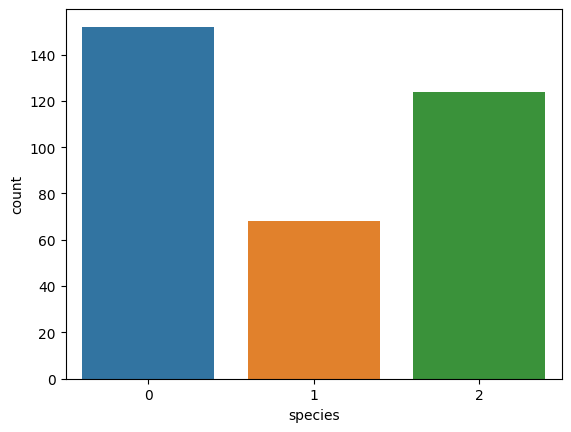

In [307]:
sns.countplot(x=df_tobe_aug['species'], data=df_tobe_aug)

In [308]:
df_tobe_aug = df_tobe_aug.drop(df_tobe_aug[df_tobe_aug['species'] == 0].sample(frac=.9).index)

In [309]:
print(f" after removong 90% of class 1: {Counter(df_tobe_aug['species'])}")

 after removong 90% of class 1: Counter({2: 124, 1: 68, 0: 15})


<AxesSubplot: xlabel='species', ylabel='count'>

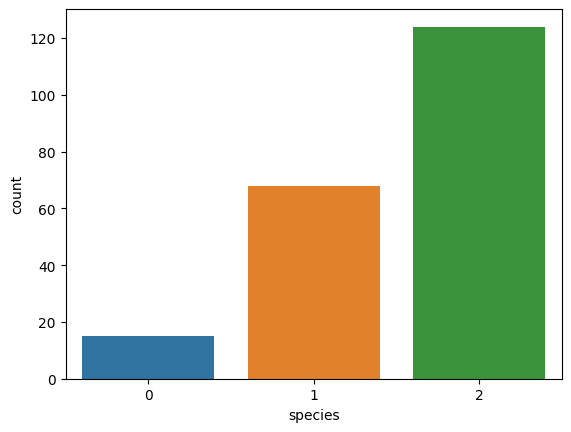

In [310]:
sns.countplot(x=df_tobe_aug['species'], data=df_tobe_aug)

### SMOTETomek

In [311]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42)
X_res, y_res = smt.fit_resample(df_tobe_aug.loc[:, df_tobe_aug.columns != 'species'], df_tobe_aug['species'])
new_x = pd.DataFrame(X_res, columns=df.columns[:-1])
new_y = pd.DataFrame(y_res, columns=['species'])
df_aug_1 = pd.concat([new_x, new_y], axis = 1)

In [312]:
print(f" after aug 1: {Counter(df_aug_1['species'])}")

 after aug 1: Counter({2: 122, 0: 120, 1: 118})


<AxesSubplot: xlabel='species', ylabel='count'>

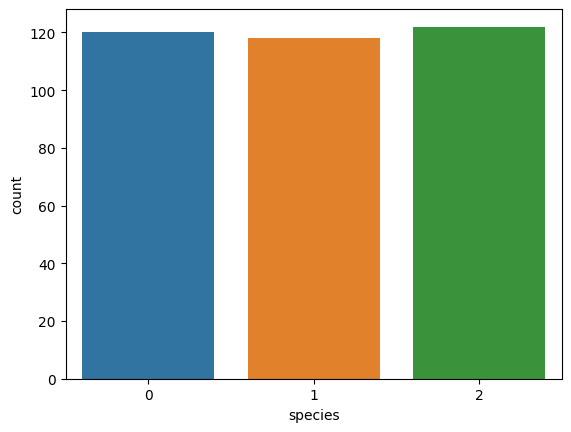

In [313]:
sns.countplot(x=df_aug_1['species'], data=df_aug_1)

### ‫‪Smoteenn‬‬

In [317]:
print(f"init: {Counter(df_tobe_aug['species'])}")

init: Counter({2: 124, 1: 68, 0: 15})


In [314]:
from imblearn.combine import SMOTEENN
smt = SMOTEENN(random_state=42)
X_res, y_res = smt.fit_resample(df_tobe_aug.loc[:, df_tobe_aug.columns != 'species'], df_tobe_aug['species'])
new_x = pd.DataFrame(X_res, columns=df.columns[:-1])
new_y = pd.DataFrame(y_res, columns=['species'])
df_aug_2 = pd.concat([new_x, new_y], axis = 1)

In [315]:
print(f" after aug 2: {Counter(df_aug_2['species'])}")

 after aug 2: Counter({2: 109, 0: 87, 1: 74})


<AxesSubplot: xlabel='species', ylabel='count'>

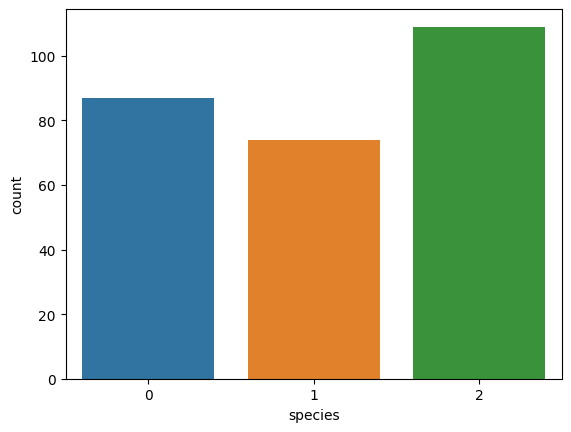

In [316]:
sns.countplot(x=df_aug_2['species'], data=df_aug_2)

## Q9

In [376]:
df_encoded.describe()

,bill_len,bill_depth,flipper_len,body_mass,island,sex,species
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,0.662791,0.520349,0.918605
std,5.443643,1.969027,14.020657,799.613058,0.726194,0.500313,0.893320
min,32.100000,13.100000,172.000000,2700.000000,0.000000,0.000000,0.000000
25%,39.275000,15.600000,190.000000,3550.000000,0.000000,0.000000,0.000000
50%,44.250000,17.300000,197.000000,4050.000000,1.000000,1.000000,1.000000
75%,48.500000,18.700000,213.000000,4750.000000,1.000000,1.000000,2.000000
max,59.600000,21.500000,231.000000,6300.000000,2.000000,1.000000,2.000000


In [377]:
df_encoded.mean()

bill_len         43.921930
bill_depth       17.151170
flipper_len     200.915205
body_mass      4201.754386
island            0.662791
sex               0.520349
species           0.918605
dtype: float64

In [378]:
df_encoded.std()

bill_len         5.443643
bill_depth       1.969027
flipper_len     14.020657
body_mass      799.613058
island           0.726194
sex              0.500313
species          0.893320
dtype: float64

In [379]:
from sklearn.preprocessing import StandardScaler

In [380]:
scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_encoded.loc[:, df_tobe_aug.columns != 'species']), columns=df.columns[:-1])
df_normalized = pd.concat([df_normalized, df_encoded['species']], axis = 1)

In [381]:
df_normalized.describe()

,island,bill_len,bill_depth,flipper_len,body_mass,sex,species
count,3.440000e+02,3.440000e+02,3.440000e+02,3.440000e+02,3.440000e+02,3.440000e+02,344.000000
mean,-1.156697e-15,4.131062e-16,-8.262125e-16,8.262125e-17,8.262125e-17,-6.454785e-18,0.918605
std,1.001457e+00,1.001457e+00,1.001457e+00,1.001457e+00,1.001457e+00,1.001457e+00,0.893320
min,-2.174858e+00,-2.060444e+00,-2.065333e+00,-1.880837e+00,-9.140204e-01,-1.041561e+00,0.000000
25%,-8.548868e-01,-7.889322e-01,-7.796428e-01,-8.162745e-01,-9.140204e-01,-1.041561e+00,0.000000
50%,6.035444e-02,7.569585e-02,-2.796522e-01,-1.900612e-01,4.650279e-01,9.600978e-01,1.000000
75%,8.422188e-01,7.877425e-01,8.631834e-01,6.866374e-01,4.650279e-01,9.600978e-01,2.000000
max,2.884265e+00,2.211836e+00,2.148873e+00,2.627899e+00,1.844076e+00,9.600978e-01,2.000000


## Q10

In [382]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X = df_encoded.loc[:, df_tobe_aug.columns != 'species']
y = df_encoded['species']
pca.fit(X)
X = pca.transform(X)
df_pca = pd.DataFrame(X)

In [383]:
df_pca = pd.concat([df_pca, df_encoded['species']], axis = 1)
df_normalized

,island,bill_len,bill_depth,flipper_len,body_mass,sex,species
0,-8.870812e-01,0.787743,-1.422488,-0.565789,1.844076,0.960098,0
1,-8.134940e-01,0.126556,-1.065352,-0.503168,1.844076,-1.041561,0
2,-6.663195e-01,0.431719,-0.422507,-1.192003,1.844076,-1.041561,0
3,-1.307172e-15,0.000000,0.000000,0.000000,1.844076,0.960098,0
4,-1.328605e+00,1.092905,-0.565361,-0.941517,1.844076,-1.041561,0
...,...,...,...,...,...,...,...
339,2.185186e+00,1.347208,0.434620,-0.252683,0.465028,0.960098,1
340,-7.762162e-02,0.482580,0.077484,-1.004139,0.465028,-1.041561,1
341,1.044584e+00,0.533440,-0.565361,-0.534479,0.465028,0.960098,1
342,1.265345e+00,0.940324,0.648902,-0.127440,0.465028,0.960098,1


## Q11

In [384]:
import matplotlib.pyplot as plt

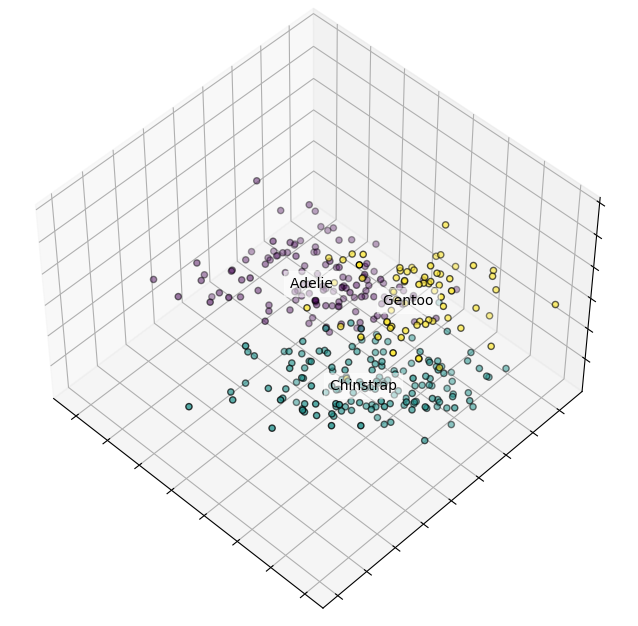

In [393]:
fig = plt.figure(1, figsize=(8, 6))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])

for name, label in [("‫‪Adelie‬‬", 0), ("‫‪Chinstrap‬‬", 1), ("‫‪Gentoo‬‬", 2)]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()

## Q12

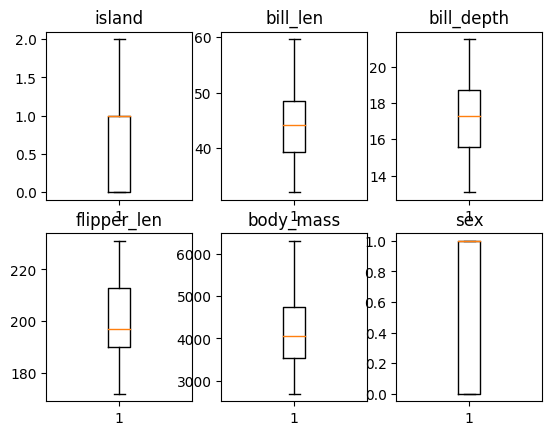

In [426]:
f, axs = plt.subplots(2, 3)
axs[0, 0].boxplot(df_encoded[df.columns[0]])
axs[0, 0].title.set_text(df.columns[0])

axs[0, 1].boxplot(df_encoded[df.columns[1]])
axs[0, 1].title.set_text(df.columns[1])

axs[0, 2].boxplot(df_encoded[df.columns[2]])
axs[0, 2].title.set_text(df.columns[2])

axs[1, 0].boxplot(df_encoded[df.columns[3]])
axs[1, 0].title.set_text(df.columns[3])

axs[1, 1].boxplot(df_encoded[df.columns[4]])
axs[1, 1].title.set_text(df.columns[4])

axs[1, 2].boxplot(df_encoded[df.columns[5]])
axs[1, 2].title.set_text(df.columns[5])

<AxesSubplot: >

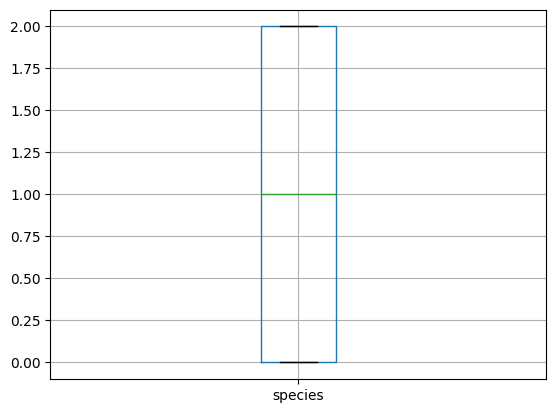

In [429]:
df_encoded.boxplot(column=df.columns[6])